In [54]:
import pandas as pd


In [55]:
df = pd.read_csv('datasets/RestaurantVisitors.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [56]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [57]:
print(df.isna().sum())
df = df[:-39]
print(df.isna().sum())

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64
weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64


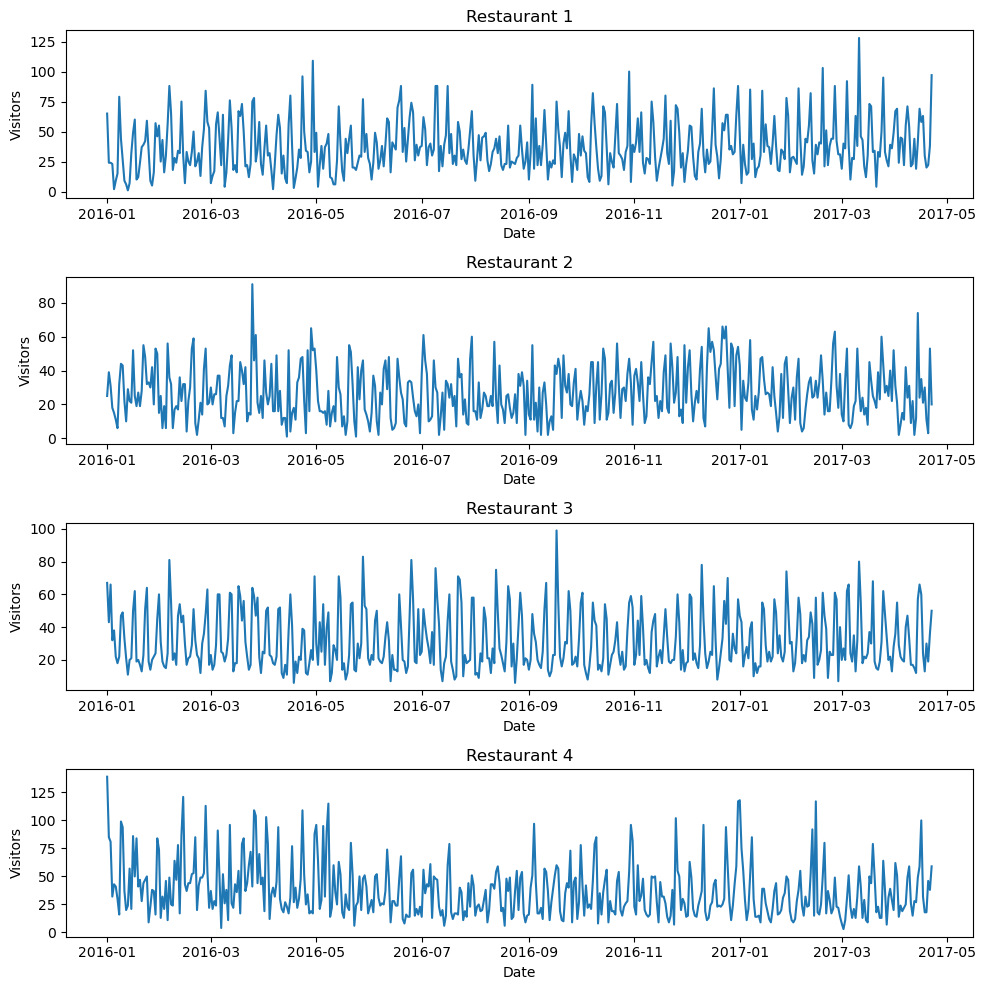

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(10, 10))

for i in range(4):
    axs[i].plot(df[f'rest{i+1}'])
    axs[i].set_title(f'Restaurant {i+1}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Visitors')

fig.tight_layout()

plt.show()

# Check the data for a weekly trend

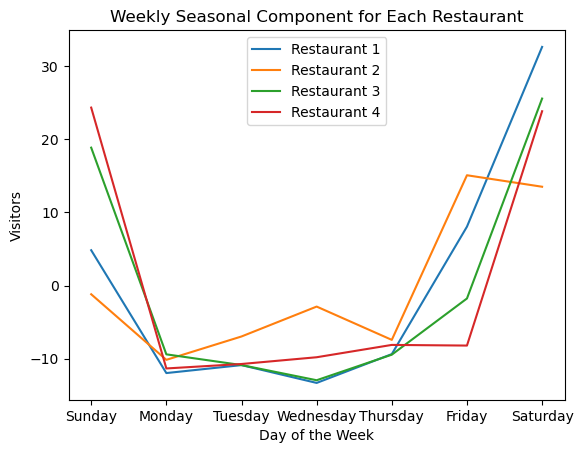

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

for i in range(4):
    weekly_decomp = seasonal_decompose(df[f'rest{i+1}'], model='additive', period=7)
    last_7_seasonal = weekly_decomp.seasonal.tail(7)
    last_7_weekday = df['weekday'].tail(7)
    plt.plot(last_7_weekday, last_7_seasonal, label=f'Restaurant {i+1}')

plt.legend()
plt.title('Weekly Seasonal Component for Each Restaurant')
plt.xlabel('Day of the Week')
plt.ylabel('Visitors')
plt.show()

A clear weekly trend can be identified, people go the the restaurants the most on saturday. 

In [79]:
from pmdarima import auto_arima

model_rest1 = auto_arima(df['rest1'], exogenous=df['holiday'] ,seasonal=True, m=7)
model_rest2 = auto_arima(df['rest2'], exogenous=df['holiday'] ,seasonal=True, m=7)
model_rest3 = auto_arima(df['rest3'], exogenous=df['holiday'] ,seasonal=True, m=7)
model_rest4 = auto_arima(df['rest4'], exogenous=df['holiday'] ,seasonal=True, m=7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(0, 1, 4)x(1, 0, [1], 7)   Log Likelihood               -2075.282
Date:                             Thu, 16 May 2024   AIC                           4164.564
Time:                                     10:29:18   BIC                           4193.736
Sample:                                 01-01-2016   HQIC                          4176.034
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8279      0.040    -20.802      0.000      -0.906      -0.750
ma.L2         -0.0316      0.055     -0.572      0.567      -0.140       0.077
ma.L3         -0.0401      0.058     -0.691      0.490      -0.154       0.074
ma.L4         -0.0841      0.045     -1.865      0.062      -0.173       0.004
ar.S.L7        0.9968      0.002    406.779      0.000       0.992       1.002
ma.S.L7       -0.9281      0.024    -38.433      0.000      -0.975      -0.881
sigma2       341.1204     15.824     21.557      0.000     310.106     372.135
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               204.95
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.93
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
models = [model_rest1, model_rest2, model_rest3, model_rest4]
for i in range(4):
    print(f'Restaurant {i+1} model order: {models[i].order}')
    print(f'Restaurant {i+1} model seasonal order: {models[i].seasonal_order}')

Restaurant 1 model order: (1, 1, 1)
Restaurant 1 model seasonal order: (1, 0, 1, 7)
Restaurant 2 model order: (2, 0, 0)
Restaurant 2 model seasonal order: (1, 0, 1, 7)
Restaurant 3 model order: (2, 0, 2)
Restaurant 3 model seasonal order: (2, 0, 2, 7)
Restaurant 4 model order: (0, 1, 4)
Restaurant 4 model seasonal order: (1, 0, 1, 7)
